# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


## Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

# 1 Chargez le jeu de données dans un dataframe à l'aide de Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# chargement des donneés dans un pandas dataframe
covid_data = pd.read_csv('data/covid19_data.csv')

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Matplotlib is building the font cache; this may take a moment.


# 2.Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc

In [2]:
#  les premières lignes du DataFrame pour vérifier le chargement
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
# les dernières lignes du DataFrame pour vérifier le chargement des données
covid_data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
# Vérifier le nombre de lignes et de colonnes de notre dataframe
print(f"Nombre de lignes : {covid_data.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {covid_data.shape[1]}")  # Nombre de colonnes

Nombre de lignes : 1048575
Nombre de colonnes : 21


In [5]:
# les informations sur notre jeux de données
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
# Exploration des plages de valeurs de chaque colonnes 
for col in covid_data.columns:
  print(f"\nColonne : {col}")
  print(f"  Valeurs uniques : {covid_data[col].unique()}")  # Valeurs uniques de chaque colonne
  print(f"  Valeur minimale : {covid_data[col].min()}")  # Valeur minimale de la colonne
  print(f"  Valeur maximale : {covid_data[col].max()}")  # Valeur maximale de la colonne
  print(f"  Nombre de valeurs manquantes : {covid_data[col].isnull().sum()}") # Nombre de valeurs manquantes


Colonne : USMER
  Valeurs uniques : [2 1]
  Valeur minimale : 1
  Valeur maximale : 2
  Nombre de valeurs manquantes : 0

Colonne : MEDICAL_UNIT
  Valeurs uniques : [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
  Valeur minimale : 1
  Valeur maximale : 13
  Nombre de valeurs manquantes : 0

Colonne : SEX
  Valeurs uniques : [1 2]
  Valeur minimale : 1
  Valeur maximale : 2
  Nombre de valeurs manquantes : 0

Colonne : PATIENT_TYPE
  Valeurs uniques : [1 2]
  Valeur minimale : 1
  Valeur maximale : 2
  Nombre de valeurs manquantes : 0

Colonne : DATE_DIED
  Valeurs uniques : ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' 

# 3.Traitez les données manquantes, incorrectes et invalides

In [7]:
# Les valeurs 97 et 99 indiquent des données manquantes suivant les informations reçu. Nous allons compter les valeurs manquantes dans chaque colonne. 
# Compter le nombre de 97 et 99 dans chaque colonne et calculer les pourcentages
def count_and_percentage(df, value):
    count = df.apply(lambda col: col.value_counts().get(value, 0), axis=0)
    percentage = (count / df.count()) * 100
    return count, percentage

count_97, percent_97 = count_and_percentage(covid_data, 97)
count_99, percent_99 = count_and_percentage(covid_data, 99)

# Calculer le pourcentage total de valeurs manquantes 
total_missing_counts = count_97 + count_99 
total_missing_percentage = (total_missing_counts / covid_data.count()) * 100 

# Résultat en DataFrame 
result = pd.DataFrame({ 
    '97_count_value': count_97, 
    '97_percentage': percent_97, 
    '99_count_value': count_99, 
    '99_percentage': percent_99, 
    'total_missing_percentage': total_missing_percentage }) 

result


C:\Users\HP\AppData\Local\Temp\ipykernel_4656\2120871421.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df.apply(lambda col: col.value_counts().get(value, 0), axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4656\2120871421.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df.apply(lambda col: col.value_counts().get(value, 0), axis=0)


,97_count_value,97_percentage,99_count_value,99_percentage,total_missing_percentage
USMER,0,0.000000,0,0.000000,0.000000
MEDICAL_UNIT,0,0.000000,0,0.000000,0.000000
SEX,0,0.000000,0,0.000000,0.000000
PATIENT_TYPE,0,0.000000,0,0.000000,0.000000
DATE_DIED,288,0.027466,261,0.024891,0.052357
INTUBED,848544,80.923539,7325,0.698567,81.622106
PNEUMONIA,0,0.000000,16003,1.526166,1.526166
AGE,135,0.012875,86,0.008202,0.021076
PREGNANT,523511,49.925947,0,0.000000,49.925947
DIABETES,0,0.000000,0,0.000000,0.000000


Nous allons effectuer des retraitements par rapport à la colonne 'SEX' et la colonne 'PREGNANT'. Il nous faudra faire un néttoyage de nos données au cas où il y aurait des hommes qui enregistre des valeurs '1' dans la colonne 'PREGNANT' ce qui biologiquement impossible.

In [8]:
# Identifier le sexe des personnes enceintes pour vérifier si '1' indique un homme ou non."
unique_sexes = covid_data.loc[covid_data['PREGNANT'] == 1, 'SEX'].unique()

unique_sexes

array([1], dtype=int64)

In [9]:
# On a constaté qu'il y a 49% de valeur manquante dans colonnes pregnant. 
# Si la ligne comporte la valeur '97' ou '99' et que le sexe est '2' avec les valeurs manquante, on va remplacer par '2'
covid_data.loc[covid_data['SEX'] == 2, 'PREGNANT'] = 2

covid_data['PREGNANT'].value_counts()

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [10]:
# On ne sait pas ce que les valeurs 98 dans la colonne PREGNANT signifie, donc nous décidons de les supprimer.
covid_data = covid_data.drop(covid_data[covid_data['PREGNANT'] == 98].index)


Le néttoyage de notre jeu de donnée se ferra comme suit :

- Supprimer les colonnes qui contiennent trop de valeurs manquantes. Dans notre cas, on va poser comme condition les colonnes avec plus de 50% de valeur manquante. Cela permettra d'améliorer la qualité des données pour l'analyse.
- Pour les autres colonnes contenant des valeurs manquante de moins de 50% :
      - si la colonne contient des valeurs numérique et que la colonne présente une asymétrie (skewness) importante, les valeurs manquantes sont remplacées par la médiane. Cela permet de minimiser l'impact des valeurs extrêmes.
      - Sinon, les valeurs manquantes sont remplacées par la moyenne, ce qui est une méthode courante pour les données symétriques.
      - Par contre si la colonne contient des valeurs catégorielle, les valeurs manquantes sont remplacées par la valeur la plus fréquente (mode), ce qui permet de conserver la distribution des catégories.

In [11]:
# Identifier les colonnes avec plus de 50% de valeurs manquantes 
colonnes_a_supprimer = total_missing_percentage[total_missing_percentage > 50].index

# Supprimer les colonnes avec plus de 50% de valeurs manquantes
covid_data = covid_data.drop(columns=colonnes_a_supprimer)

In [12]:
# Remplacer les valeurs 97 et 99 par les valeur "nan"
exclude_columns = ['AGE']
for col in covid_data.columns:
    if col not in exclude_columns:
        covid_data[col] = covid_data[col].replace([97, 99], np.nan)


In [13]:
# Liste des colonnes à exclure
exclude_columns = ['AGE']

# Traiter les colonnes, en excluant certaines
for colonne in covid_data.columns:
    if colonne not in exclude_columns:
        if covid_data[colonne].isnull().any():  # Vérifier s'il y a des valeurs manquantes dans la colonne
            if pd.api.types.is_numeric_dtype(covid_data[colonne]):  # Vérifier si la colonne est numérique
                if covid_data[colonne].skew() > 0.5 or covid_data[colonne].skew() < -0.5:  # Asymétrie
                    covid_data[colonne] = covid_data[colonne].fillna(covid_data[colonne].median())
                    print(f"Imputation par la médiane pour la colonne {colonne}")
                else:
                    covid_data[colonne] = covid_data[colonne].fillna(covid_data[colonne].mean())
                    print(f"Imputation par la moyenne pour la colonne {colonne}")
            else:  # Colonne catégorielle
                covid_data[colonne] = covid_data[colonne].fillna(covid_data[colonne].mode()[0])
                print(f"Imputation par le mode pour la colonne {colonne}")


Imputation par la médiane pour la colonne PNEUMONIA


In [14]:
# Vérification de résultat après traitement des valeurs manquantes 
count_97, percent_97 = count_and_percentage(covid_data, 97)
count_99, percent_99 = count_and_percentage(covid_data, 99)

# Calculer le pourcentage total de valeurs manquantes 
total_missing_counts = count_97 + count_99 
total_missing_percentage = (total_missing_counts / covid_data.count()) * 100 

# Résultat en DataFrame 
result = pd.DataFrame({ 
    '97_count_value': count_97, 
    '97_percentage': percent_97, 
    '99_count_value': count_99, 
    '99_percentage': percent_99, 
    'total_missing_percentage': total_missing_percentage }) 

result

C:\Users\HP\AppData\Local\Temp\ipykernel_4656\2120871421.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df.apply(lambda col: col.value_counts().get(value, 0), axis=0)
C:\Users\HP\AppData\Local\Temp\ipykernel_4656\2120871421.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df.apply(lambda col: col.value_counts().get(value, 0), axis=0)


,97_count_value,97_percentage,99_count_value,99_percentage,total_missing_percentage
USMER,0,0.000000,0,0.000000,0.000000
MEDICAL_UNIT,0,0.000000,0,0.000000,0.000000
SEX,0,0.000000,0,0.000000,0.000000
PATIENT_TYPE,0,0.000000,0,0.000000,0.000000
DATE_DIED,288,0.027565,261,0.024980,0.052545
PNEUMONIA,0,0.000000,0,0.000000,0.000000
AGE,135,0.012921,85,0.008135,0.021056
PREGNANT,0,0.000000,0,0.000000,0.000000
DIABETES,0,0.000000,0,0.000000,0.000000
COPD,0,0.000000,0,0.000000,0.000000


Pour notre analyse, nous allons vérifier les valeurs aberrantes. Nous utiliserons des boxplots pour détecter les valeurs aberrantes dans la colonne 'AGE', en corrélation avec les colonnes 'Pregnant' et 'Tobacco'. Un enfant de 10 ans ou moins ne peut pas être enceinte ni fumer. Pour corriger l'âge, nous appliquerons la méthode IQR pour traiter les valeurs aberrantes détectées.  

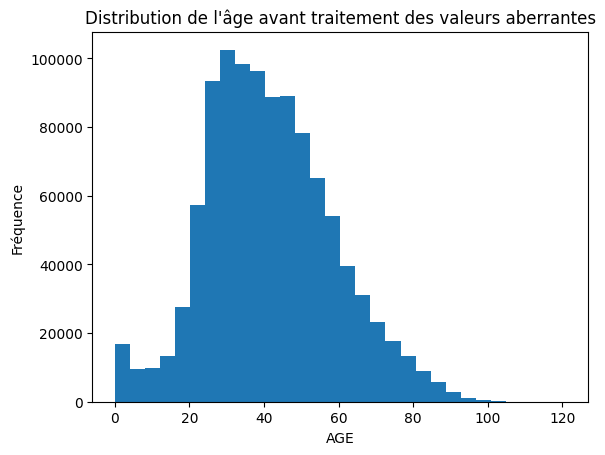

In [15]:
# Afficher la distribution des données dans la colonne 'Age'
plt.hist(covid_data['AGE'], bins=30)
plt.xlabel("AGE")
plt.ylabel("Fréquence")
plt.title("Distribution de l'âge avant traitement des valeurs aberrantes")
plt.show()

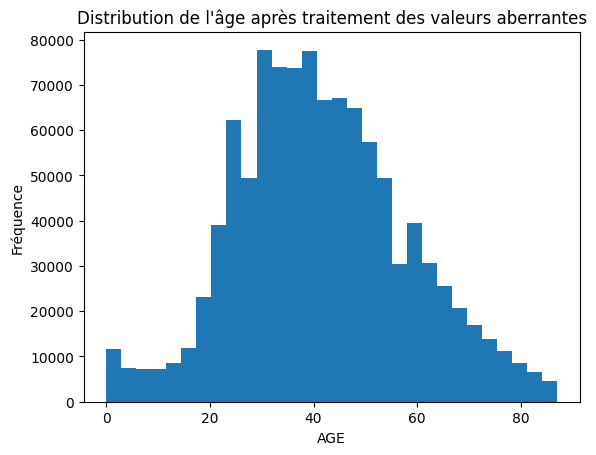

In [16]:
# Remplacement des valeurs aberrantes par la médiane
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()
    return data

# Traitement de valeur aberrante constaté dans colonne 'AGE'
covid_data = replace_outliers_with_median(covid_data, 'AGE')


# Validation
# Après traitement, vérifier la distribution de la colonne 'Age'
plt.hist(covid_data['AGE'], bins=30)
plt.xlabel("AGE")
plt.ylabel("Fréquence")
plt.title("Distribution de l'âge après traitement des valeurs aberrantes")
plt.show()

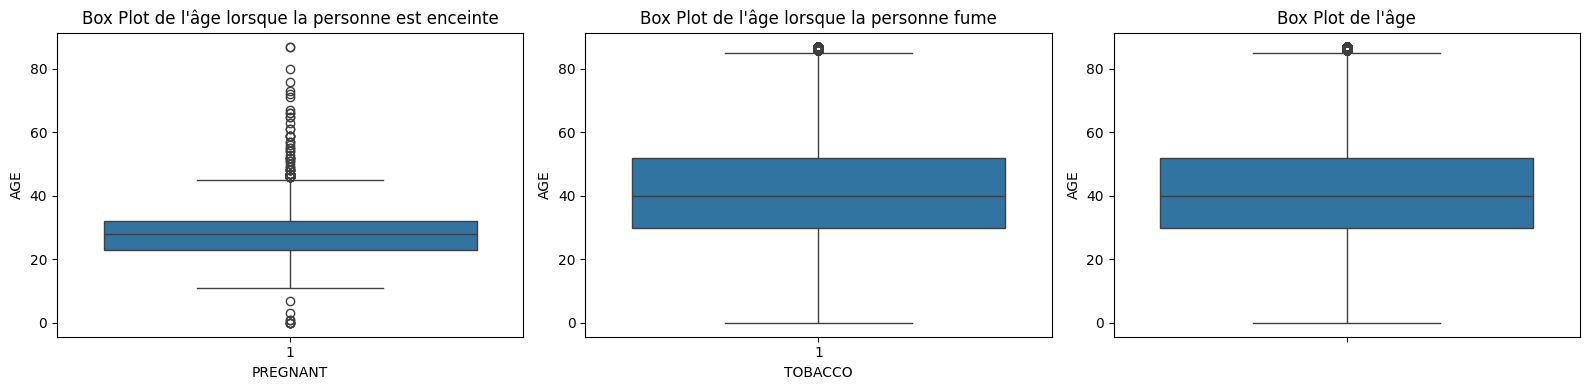

In [17]:
# Détection des valeurs aberrantes basées sur AGE, PREGNANT et TOBACCO
# Création des box plot 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Box plot pour 'PREGNANT' == 1 par rapport à 'AGE'
sns.boxplot(x='PREGNANT', y='AGE', data=covid_data[covid_data['PREGNANT'] == 1], ax=axes[0])
axes[0].set_title('Box Plot de l\'âge lorsque la personne est enceinte' )

# Box plot pour 'TOBACCO' == 1 par rapport à 'AGE'
sns.boxplot(x='TOBACCO', y='AGE', data=covid_data[covid_data['TOBACCO'] == 1], ax=axes[1])
axes[1].set_title('Box Plot de l\'âge lorsque la personne fume')

# Box plot pour l'âge
sns.boxplot(y='AGE', data=covid_data, ax=axes[2])
axes[2].set_title('Box Plot de l\'âge')

# Ajuster la disposition
plt.tight_layout()
plt.show()

In [18]:
# Supprimer les valeurs abérrantes en utilisant la méthode IQR
Q1 = covid_data[covid_data['PREGNANT'] == 1]['AGE'].quantile(0.25)
Q3 = covid_data[covid_data['PREGNANT'] == 1]['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Supprimer les valeurs aberrantes pour les personnes enceintes
covid_data = covid_data[~((covid_data['PREGNANT'] == 1) & ((covid_data['AGE'] <= (Q1 - 1.5 * IQR)) | (covid_data['AGE'] > (Q3 + 1.5 * IQR))))]
covid_data[covid_data['PREGNANT'] == 1]['AGE'].unique()

# Supprimer les valeurs aberrantes pour les personnes qui fument 
covid_data = covid_data[~((covid_data['TOBACCO'] == 1) & ((covid_data['AGE'] <= 10)))]


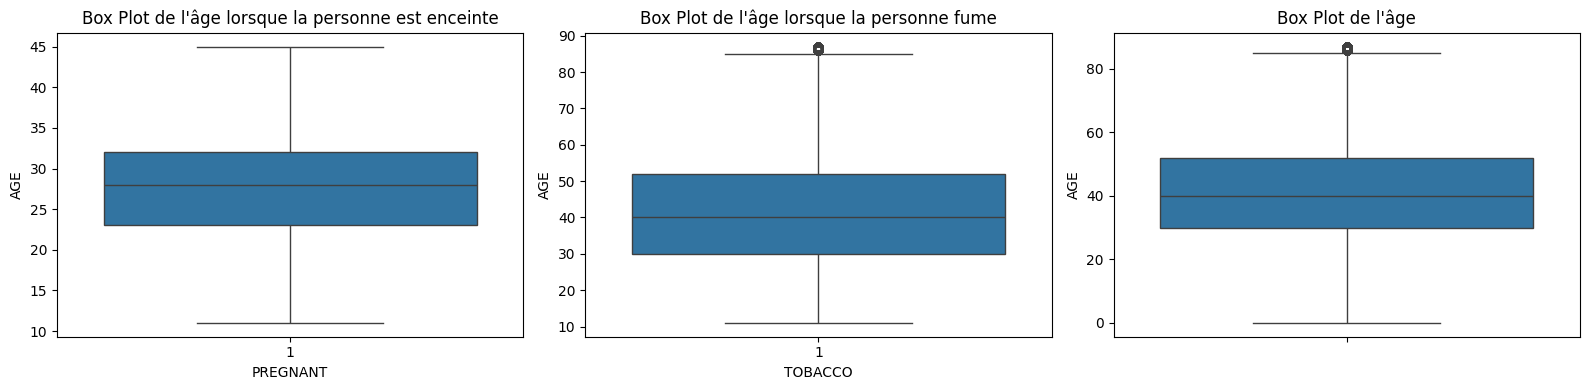

In [19]:
# Vérification de la correction des valeurs abérrantes 
# Création des box plot 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Box plot pour 'PREGNANT' == 1 par rapport à 'AGE'
sns.boxplot(x='PREGNANT', y='AGE', data=covid_data[covid_data['PREGNANT'] == 1], ax=axes[0])
axes[0].set_title('Box Plot de l\'âge lorsque la personne est enceinte' )

# Box plot pour 'TOBACCO' == 1 par rapport à 'AGE'
sns.boxplot(x='TOBACCO', y='AGE', data=covid_data[covid_data['TOBACCO'] == 1], ax=axes[1])
axes[1].set_title('Box Plot de l\'âge lorsque la personne fume')

# Box plot pour l'âge
sns.boxplot(y='AGE', data=covid_data, ax=axes[2])
axes[2].set_title('Box Plot de l\'âge')

# Ajuster la disposition
plt.tight_layout()
plt.show()

# 4 - Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

In [20]:
# Remplacer les date '9999-99-99' représente des valeurs de dates pour lesquelles les patients ne sont pas morts
covid_data['DATE_DIED'] = covid_data['DATE_DIED'].replace('9999-99-99','-')

# Création d'une colonne 'died' qui détermine le statut de la personne s'il est décédé ou non
covid_data['Died'] = covid_data['DATE_DIED'].apply(lambda x: 'Yes' if x != '-' else 'No')

# Aperçu des données mises à jour
print(covid_data[['DATE_DIED', 'Died']].tail())

        DATE_DIED Died
1048570         -   No
1048571         -   No
1048572         -   No
1048573         -   No
1048574         -   No


## Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.


# 1.Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.

In [21]:
covid_data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06,1.044606e+06
mean,1.632290e+00,8.973190e+00,1.501068e+00,1.190986e+00,1.866204e+00,4.153206e+01,1.992281e+00,2.170779e+00,2.244415e+00,2.226565e+00,2.281208e+00,2.113227e+00,2.418208e+00,2.245871e+00,2.109719e+00,2.241578e+00,2.198992e+00,5.305559e+00
std,4.821821e-01,3.725541e+00,4.999991e-01,3.930781e-01,3.404331e-01,1.649727e+01,8.751645e-02,5.286089e+00,4.979832e+00,4.961850e+00,5.313013e+00,5.092216e+00,6.524591e+00,5.046299e+00,5.031885e+00,4.988303e+00,5.183630e+00,1.881293e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.200000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,8.700000e+01,2.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00


# 2.Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.

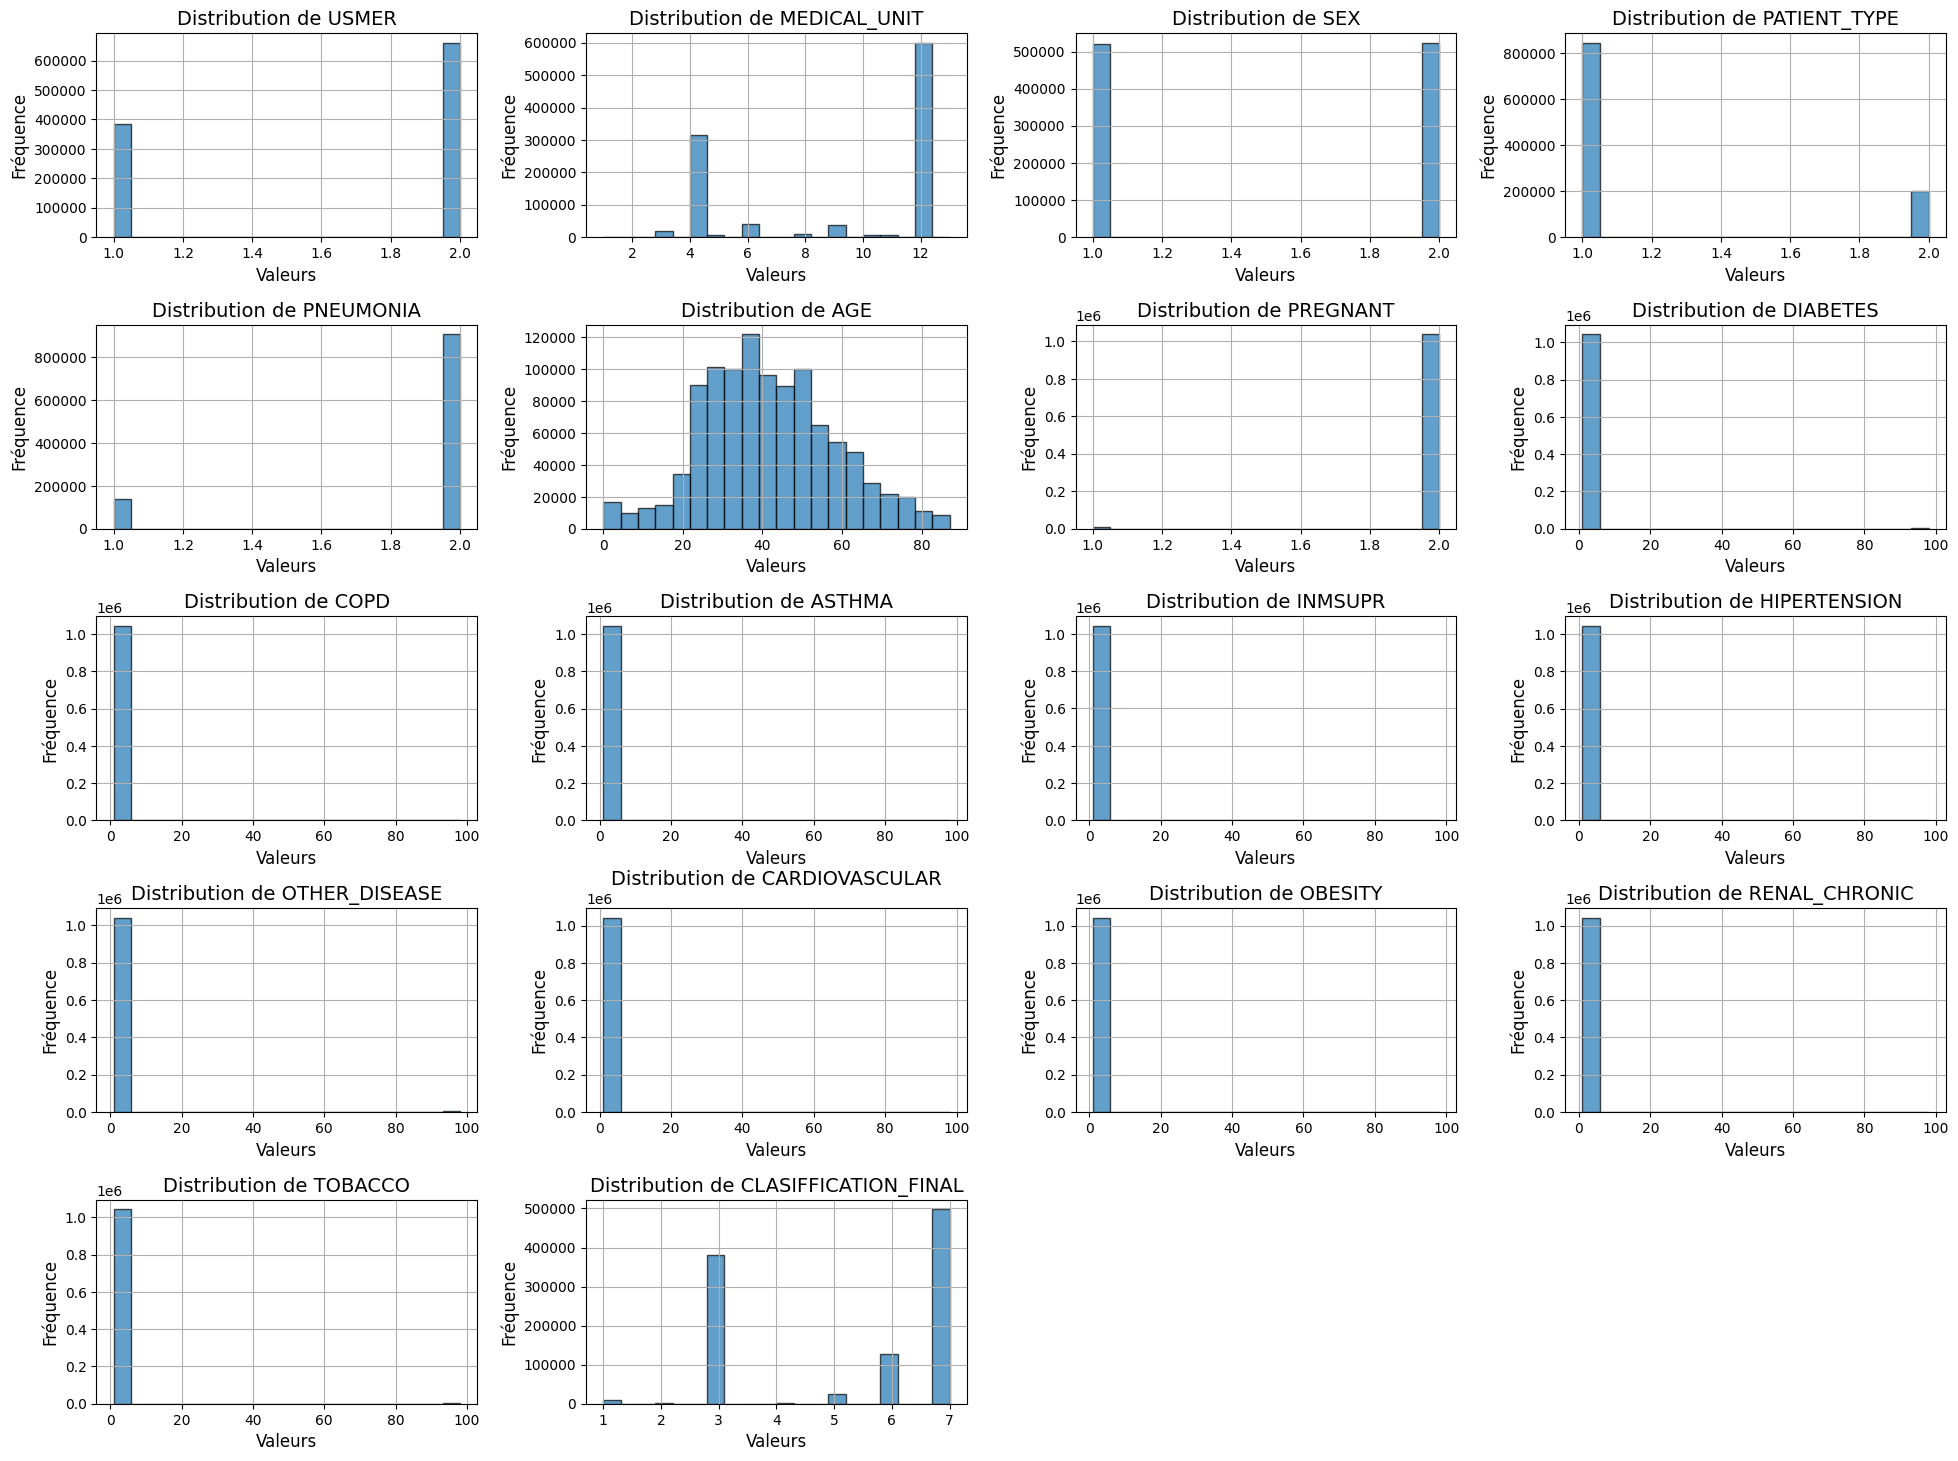

In [22]:
# Visualisation des distributions des colonnes numériques
df = pd.DataFrame(covid_data)

# Création des histogrammes avec des sous-graphiques
axes = df.hist(bins=20, edgecolor='black', alpha=0.7, figsize=(20, 15))
plt.tight_layout(pad=3.0)

# Ajout de titres et labels pour chaque sous-graphe
for ax in axes.flatten():
    ax.set_title(f'Distribution de {ax.get_title()}', fontsize=14)
    ax.set_xlabel('Valeurs', fontsize=12)
    ax.set_ylabel('Fréquence', fontsize=12)

# Affichage des graphiques
plt.show()

# 3.Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les features (voir visualisation avec heatmap)

In [23]:
# Transformer les données en dataframe
df = pd.DataFrame(covid_data)

# Calcul de la matrice des corrélations
data = df.drop('DATE_DIED', axis=1, inplace=True)

In [24]:
# Visualiser les colonnes disponbles
covid_data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'Died'],
      dtype='object')

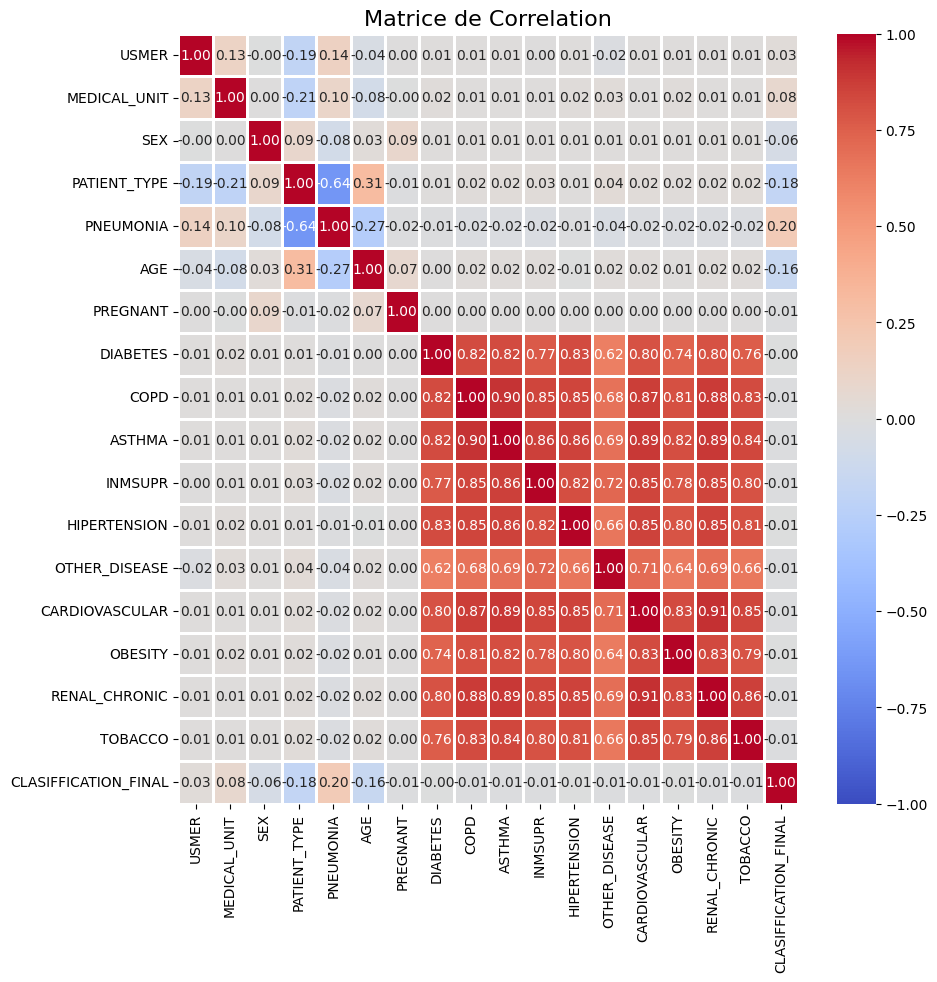

In [25]:
corr_matrix = covid_data[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']].corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10,10))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Matrice de Correlation', fontsize=16)

# Afficher le graphique
plt.show()

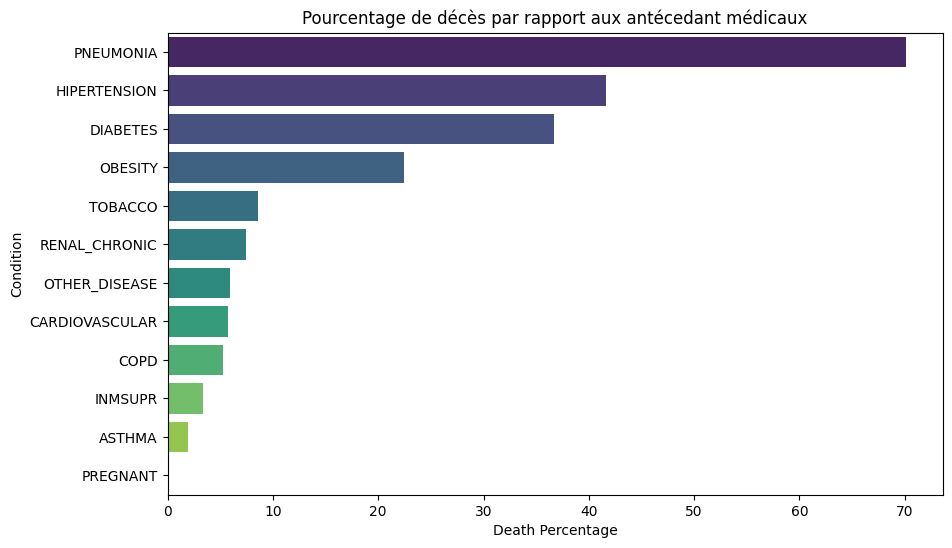

In [26]:
# Analyse de correlation entre les différentes maladies et le risque de décès au covid 19
# Calculer le nombre total de décès
total_deaths = covid_data[covid_data['Died'] == 'Yes'].Died.count()

# Vérifier si total_deaths est supérieur à 0
if total_deaths > 0:
    percentage = []
    columns = ['PNEUMONIA', 'PREGNANT', 'HIPERTENSION', 'OBESITY', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO', 'OTHER_DISEASE', 'COPD', 'DIABETES', 'ASTHMA', 'INMSUPR']
    for column in columns:
        percentage_per_column = (covid_data[(covid_data['Died'] == 'Yes') & (covid_data[column] == 1)].Died.count() / total_deaths) * 100
        percentage.append(percentage_per_column)

    # Création de dataframe 
    plot_data = pd.DataFrame({'Column': columns, 'Percentage': percentage})

    # Réorganisation de dataframe par ordre décroissant
    plot_data = plot_data.sort_values(by='Percentage', ascending=False)

    # Afficher le diagramme 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Percentage', y='Column', data=plot_data, hue='Column', palette='viridis', legend=False)
    plt.title('Pourcentage de décès par rapport aux antécedant médicaux')
    plt.xlabel('Death Percentage')
    plt.ylabel('Condition')
    plt.show()
else:
    print("Il n'y a pas de décès dans le jeu de données.")

# 4.Notez les résultats intéressants de l'analyse exploratoire.

- L'âge moyen des patients atteints de la COVID-19 est de 41 ans, ce qui confirme l'idée que les personnes plus âgées sont davantage susceptibles de tomber malades.
  
- Une forte corrélation a été observée entre les antécédents d'accidents cardiovasculaires et les maladies rénales. De même, il existe une corrélation significative entre l'asthme et les maladies cardiovasculaires. Il pourrait être intéressant d'explorer ces liens dans de futures études, afin de formuler des recommandations plus adaptées aux patients souffrant de ces pathologies.
  
- Les classifications 7,3 et 6 sont les plus fréquentes parmi les patients atteints de la COVID-19.
  
- Nous avons également constaté que les patients âgés de 65 ans ou plus présentent le taux de mortalité le plus élevé.

## Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

Question 1 : Quel est le sexe le plus où on enregistre le plus d'infection au COVID-19 et de taux mortalité due au COVID-19?
            Que montre l'analyse des données concernant l'influence du sexe sur la mortalité due au COVID-19 ?

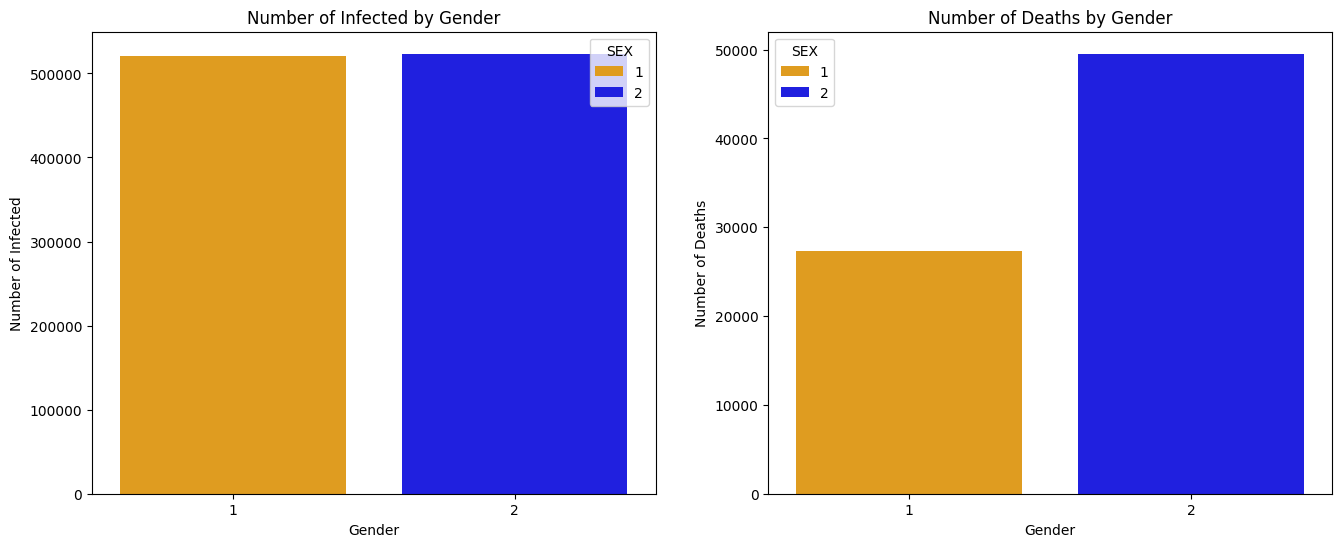

In [27]:
# Filter the DataFrame for rows where "Date_died" is not '-'
deaths_df = covid_data[covid_data['DATE_DIED'] != '-']
death_counts = deaths_df['SEX'].value_counts()
infection_counts = covid_data['SEX'].value_counts()
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Définir les couleurs d'affichage par sexe 
colors = {1: 'orange', 2: 'blue'}

# Definition des paramètres de l'histogramme d'infection à la COVID enregistré par genre 
sns.barplot(x=infection_counts.index, y=infection_counts.values, hue=infection_counts.index, palette=colors, ax=ax1)
ax1.set_title('Number of Infected by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Infected')

# Definition des paramètres de l'histogramme de décès par genre 
sns.barplot(x=death_counts.index, y=death_counts.values, hue=death_counts.index, palette=colors, ax=ax2)
ax2.set_title('Number of Deaths by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Deaths')

plt.show()

Question 2 : Comment les taux d'infection et de mortalité varient-ils entre les groupes d'âge? 

In [28]:
# Definition de la limites des tranches d'âges à analyser 
age_bins = [0, 18, 34, 49, int(covid_data['AGE'].max())]
age_labels = ['0-18', '19-34', '35-49', '50+']

# Insertion de nouvelle colonne 'Age Group' en utilisant pd.cut pour la segmentation des tranches d'âges 
covid_data['Age Group'] = pd.cut(covid_data['AGE'], bins=age_bins, labels=age_labels, right=False)
covid_data['Age Group'].value_counts()

Age Group
35-49    353884
50+      334405
19-34    301042
0-18      53914
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_4656\79030154.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_df.loc[:, 'Age Group'] = pd.cut(deaths_df['AGE'], bins=age_bins, labels=age_labels, right=False)


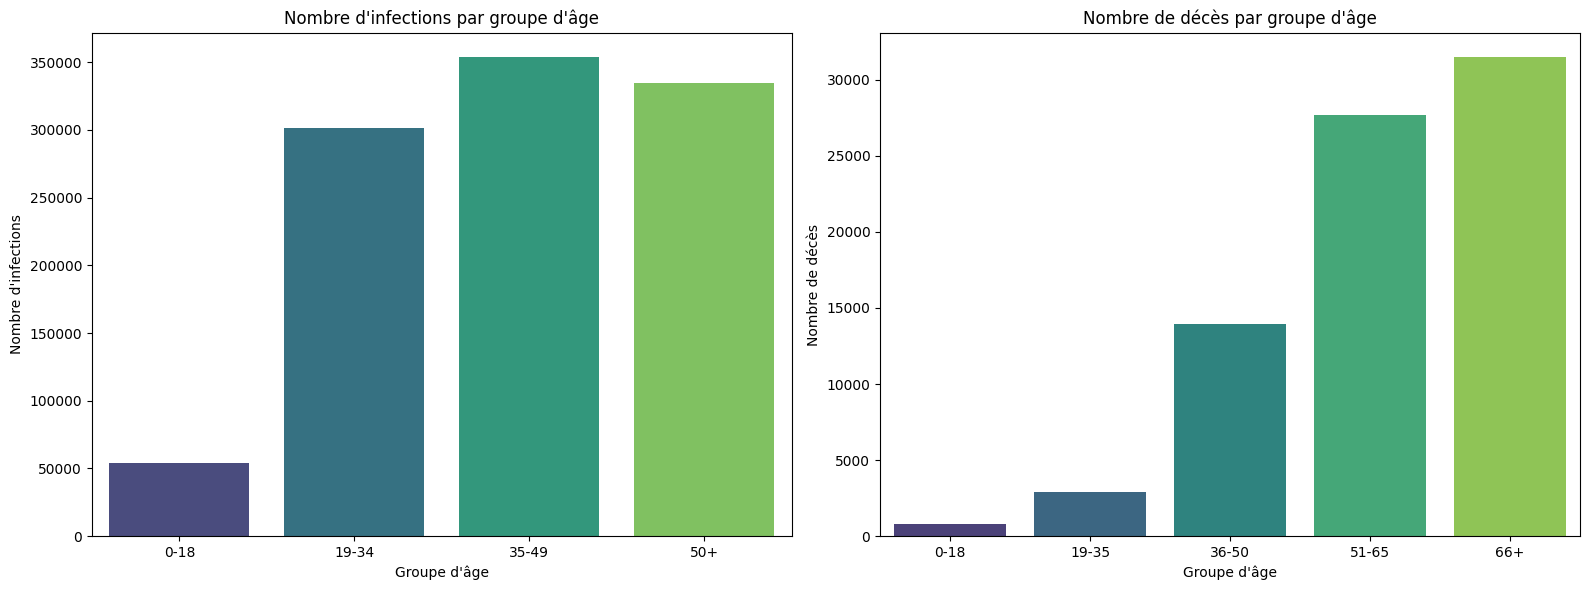

In [29]:
# Vérifiez si la colonne 'Age Group' existe dans deaths_df
if 'Age Group' not in deaths_df.columns:
    # Définir les intervalles et les labels pour les groupes d'âge
    age_bins = [0, 18, 35, 50, 65, 100]  # Intervalles d'âge
    age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']  # Labels correspondants

    # Créer la colonne 'Age Group' dans deaths_df
    #deaths_df['Age Group'] = pd.cut(deaths_df['Age'], bins=age_bins, labels=age_labels, right=False)
    deaths_df.loc[:, 'Age Group'] = pd.cut(deaths_df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Compter les infections par groupe d'âge
infection_counts_by_age_group = covid_data['Age Group'].value_counts()

# Compter les décès par groupe d'âge
death_counts_age_group = deaths_df['Age Group'].value_counts()

# Créer des sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique pour les infections par groupe d'âge
sns.barplot(
    x=infection_counts_by_age_group.index,
    y=infection_counts_by_age_group.values,
    hue=infection_counts_by_age_group.index,  # Ajout de 'hue'
    palette='viridis',
    ax=ax1,
    legend=False  # Désactive la légende si elle n'est pas nécessaire
)
ax1.set_title('Nombre d\'infections par groupe d\'âge')
ax1.set_xlabel('Groupe d\'âge')
ax1.set_ylabel('Nombre d\'infections')

# Graphique pour les décès par groupe d'âge
sns.barplot(
    x=death_counts_age_group.index,
    y=death_counts_age_group.values,
    hue=death_counts_age_group.index,  # Ajout de 'hue'
    palette='viridis',
    ax=ax2,
    legend=False  # Désactive la légende si elle n'est pas nécessaire
)
ax2.set_title('Nombre de décès par groupe d\'âge')
ax2.set_xlabel('Groupe d\'âge')
ax2.set_ylabel('Nombre de décès')

plt.tight_layout()
plt.show()

Question 3 : Quel est le résultat le plus enregistré lors du diagnostic d'infection à la covid des patients étudiés ?  

In [30]:
result_diag = covid_data['CLASIFFICATION_FINAL'].value_counts().reset_index()
result_diag

,CLASIFFICATION_FINAL,count
0,7,497454
1,3,380140
2,6,127488
3,5,25991
4,1,8564
5,4,3118
6,2,1851


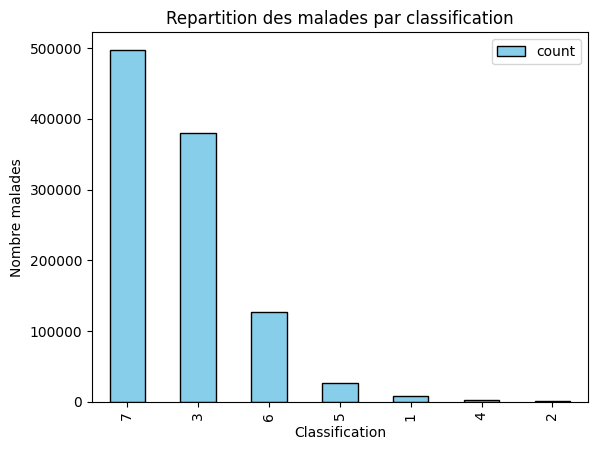

In [31]:
df = result_diag
df.plot(kind='bar', x='CLASIFFICATION_FINAL', y='count', color='skyblue', edgecolor='black')
plt.xlabel('Classification')
plt.ylabel('Nombre malades')
plt.title('Repartition des malades par classification')
plt.show()

# Plot pour créer des graphes

Reponse question 1 : Nous pouvons voir ici que même si le nombre de personnes infectées par sexe est presque égal, les hommes présentent une mortalité beaucoup plus élevée par rapport à l'infection au COVID-19.

Reponse question 2 : En excluant le groupe des 0-18 ans, les trois autres groupes d'âge comptent un nombre presque égal de personnes infectées. Cependant, la grande majorité des décès concerne le groupe des 50 ans et plus. En effet, les personnes de 50 ans et plus sont plus susceptibles de souffrir de maladies chroniques telles que les maladies cardiovasculaires, le diabète ou l'hypertension, qui augmentent les complications du COVID-19. De plus, le système immunitaire vieillit et devient moins efficace, ce qui rend les infections plus graves et les récupérations plus lentes. Ainsi, nous pouvons conclure que les personnes âgées de 50 ans et plus courent des risques nettement plus élevés par rapport aux groupes d'âge plus jeunes.

Reponse question 3 : On a constaté que lors du diagnostic des patients, c'est la classification 7 suivi de la classification 3 qui sont les plus enregistré.   


## Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

Analyse

Analyse des Données des Patients Atteints de COVID-19
Moyenne d'âge des patients :
L'âge moyen des patients atteints de COVID-19 est de 41 ans, ce qui confirme l'hypothèse selon laquelle les personnes plus âgées sont plus susceptibles de contracter la maladie. Toutefois, bien que l'âge moyen soit relativement modéré, cela souligne l'importance d'observer les groupes d'âge avancé, qui restent particulièrement vulnérables face aux formes graves de la maladie.

Corrélations fortes entre certaines pathologies :
Il existe une forte corrélation entre les antécédents de maladies cardiovasculaires et de maladies rénales. Cela suggère qu'un patient souffrant de l'une de ces pathologies pourrait également être à risque accru de souffrir de l'autre. De plus, une autre corrélation notable se trouve entre les patients ayant des antécédents d'asthme et ceux souffrant de maladies cardiovasculaires. Ces résultats méritent d’être approfondis dans des études futures afin de mieux comprendre les liens entre ces affections et d'élaborer des recommandations cliniques personnalisées pour les patients présentant plusieurs comorbidités.

Les classifications les plus fréquentes chez les patients COVID :
Parmi les patients atteints de COVID-19, les classifications les plus fréquentes sont 7,3 et 6, ce qui pourrait faire référence à un système de classification des symptômes ou de gravité de la maladie. Cette tendance doit être examinée de plus près pour mieux comprendre les variations cliniques et peut-être affiner le système de classification pour des traitements plus ciblés.

Décès chez les patients âgés de 65 ans et plus :
Il a été observé que les patients âgés de 65 ans et plus sont ceux qui décèdent le plus fréquemment en raison du COVID-19. Cela renforce l'importance d'un suivi médical accru et de la mise en place de mesures de prévention pour les personnes âgées, notamment celles présentant des comorbidités comme les maladies cardiaques ou pulmonaires.

Conclusion
Cette analyse met en lumière plusieurs tendances importantes concernant les facteurs de risque et les caractéristiques des patients atteints de COVID-19. Des études futures devraient explorer en profondeur les corrélations entre les maladies chroniques, telles que les pathologies cardiovasculaires et rénales, ainsi que les implications de l'âge dans la mortalité. En approfondissant ces points, il sera possible de développer des stratégies de traitement plus ciblées et des recommandations de prévention adaptées aux groupes de patients les plus vulnérables.

### Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 3 modèles de machine learning (regression linéaire, *random forest*, *Naive Bayes*) suivant les trois critères: *recall*, *accuracy*, *precision*

In [32]:
# transformation de données
# Créer une nouvelle colonne binaire 'high_risk'
covid_data['high_risk'] = covid_data['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

model_data = covid_data.drop(['DATE_DIED', 'CLASIFFICATION_FINAL'], axis=1)

In [33]:
model_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Died,Age Group,high_risk
0,2,1,1,1,1.0,65,2,2,2,2,2,1,2,2,2,2,2,Yes,50+,1
1,2,1,2,1,1.0,72,2,2,2,2,2,1,2,2,1,1,2,Yes,50+,0
2,2,1,2,2,2.0,55,2,1,2,2,2,2,2,2,2,2,2,Yes,50+,1
3,2,1,1,1,2.0,53,2,2,2,2,2,2,2,2,2,2,2,Yes,50+,0
4,2,1,2,1,2.0,68,2,1,2,2,2,1,2,2,2,2,2,Yes,50+,1


In [34]:
for column in model_data.columns:
    print(f"Unique values in column '{column}':")
    print(model_data[column].value_counts())
    print()  # Pour une meilleure lisibilité

Unique values in column 'USMER':
USMER
2    660494
1    384112
Name: count, dtype: int64

Unique values in column 'MEDICAL_UNIT':
MEDICAL_UNIT
12    599834
4     314166
6      40410
9      37782
3      19155
8      10391
10      7866
5       7231
11      5571
13       990
7        890
2        169
1        151
Name: count, dtype: int64

Unique values in column 'SEX':
SEX
2    523419
1    521187
Name: count, dtype: int64

Unique values in column 'PATIENT_TYPE':
PATIENT_TYPE
1    845101
2    199505
Name: count, dtype: int64

Unique values in column 'PNEUMONIA':
PNEUMONIA
2.0    904842
1.0    139764
Name: count, dtype: int64

Unique values in column 'AGE':
AGE
40    29445
30    26905
31    25830
28    25223
29    25041
      ...  
83     2121
84     2036
85     1780
86     1447
87     1361
Name: count, Length: 88, dtype: int64

Unique values in column 'PREGNANT':
PREGNANT
2    1036543
1       8063
Name: count, dtype: int64

Unique values in column 'DIABETES':
DIABETES
2     916774
1     1

In [35]:
model_data = model_data[~model_data.isin([98]).any(axis=1)]

In [36]:
for column in model_data.columns:
    print(f"Unique values in column '{column}':")
    print(model_data[column].value_counts())
    print()# Pour une meilleure lisibilité 

Unique values in column 'USMER':
USMER
2    656234
1    381035
Name: count, dtype: int64

Unique values in column 'MEDICAL_UNIT':
MEDICAL_UNIT
12    594911
4     313794
6      39617
9      37167
3      19039
8      10270
10      7537
5       7218
11      5553
13       973
7        870
2        169
1        151
Name: count, dtype: int64

Unique values in column 'SEX':
SEX
2    519141
1    518128
Name: count, dtype: int64

Unique values in column 'PATIENT_TYPE':
PATIENT_TYPE
1    840813
2    196456
Name: count, dtype: int64

Unique values in column 'PNEUMONIA':
PNEUMONIA
2.0    899922
1.0    137347
Name: count, dtype: int64

Unique values in column 'AGE':
AGE
40    29169
30    26789
31    25714
28    25100
29    24931
      ...  
83     2086
84     2002
85     1756
86     1429
87     1340
Name: count, Length: 88, dtype: int64

Unique values in column 'PREGNANT':
PREGNANT
2    1029237
1       8032
Name: count, dtype: int64

Unique values in column 'DIABETES':
DIABETES
2    913594
1    123

In [37]:
model_data.shape

(1037269, 20)

In [38]:
# Ici nous utilisons le one-hot-encoding pour facilité la consommation des donnés par le model et eviter de creer des biais
y = model_data['high_risk']
age = model_data['AGE']
model_data = model_data.drop(columns=['AGE', 'high_risk', 'MEDICAL_UNIT']).astype('category')

In [39]:
data_dummies = pd.get_dummies(model_data).astype(int)
data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1.0,PNEUMONIA_2.0,PREGNANT_1,PREGNANT_2,...,RENAL_CHRONIC_1,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2,Died_No,Died_Yes,Age Group_0-18,Age Group_19-34,Age Group_35-49,Age Group_50+
0,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,0,1,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,1,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [40]:
data_dummies['AGE'] = age

In [41]:
data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1.0,PNEUMONIA_2.0,PREGNANT_1,PREGNANT_2,...,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2,Died_No,Died_Yes,Age Group_0-18,Age Group_19-34,Age Group_35-49,Age Group_50+,AGE
0,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,65
1,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,72
2,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,55
3,0,1,1,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,53
4,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,68


In [42]:
# Standariser

# Initialiser le mesureur
scaler = StandardScaler()

# Normaliser la colonne
data_dummies['AGE'] = scaler.fit_transform(data_dummies[['AGE']])

data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1.0,PNEUMONIA_2.0,PREGNANT_1,PREGNANT_2,...,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2,Died_No,Died_Yes,Age Group_0-18,Age Group_19-34,Age Group_35-49,Age Group_50+,AGE
0,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,1.426392
1,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,1.851135
2,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0.819617
3,0,1,1,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0.698262
4,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1.608425


In [43]:
data_dummies.shape

(1037269, 37)

In [44]:
y.shape

(1037269,)

In [45]:
# Vérifier les valeurs NaN dans le DataFrame
nan_summary = covid_data.isna().sum()

# Afficher les colonnes qui contiennent des valeurs NaN
print("Résumé des colonnes avec des valeurs NaN :")
print(nan_summary[nan_summary > 0])

# Optionnel : Afficher le DataFrame entier des valeurs NaN pour une vue détaillée
nan_details = covid_data.isna()
print("\nDétails des valeurs NaN :")
print(nan_details)


Résumé des colonnes avec des valeurs NaN :
Age Group    1361
dtype: int64

Détails des valeurs NaN :
         USMER  MEDICAL_UNIT    SEX  PATIENT_TYPE  DATE_DIED  PNEUMONIA  \
0        False         False  False         False      False      False   
1        False         False  False         False      False      False   
2        False         False  False         False      False      False   
3        False         False  False         False      False      False   
4        False         False  False         False      False      False   
...        ...           ...    ...           ...        ...        ...   
1048570  False         False  False         False      False      False   
1048571  False         False  False         False      False      False   
1048572  False         False  False         False      False      False   
1048573  False         False  False         False      False      False   
1048574  False         False  False         False      False      False   

In [63]:
# 1. Diviser le jeu de données (80% entrainement, 20% test)
X = data_dummies
y = y

# Diviser les données en 80% d'entrainement et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données pour la régression linéaire et Naive Bayes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entraîner les modèles
# 2.1 Régression Linéaire (Logistic Regression)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 2.2 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2.3 Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# 3. Évaluation des modèles
# Pour chaque modèle, calculons les métriques : Accuracy, Precision, Recall

# Régression Linéaire
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# 4. Comparer les résultats dans un DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_nb],
    'Precision': [precision_lr, precision_rf, precision_nb],
    'Recall': [recall_lr, recall_rf, recall_nb]
})

# Afficher les résultats
print(results)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.668090   0.651674  0.232663
1        Random Forest  0.660330   0.605079  0.251790
2          Naive Bayes  0.646244   0.536349  0.366024


# Sauvegarder le Modèle¶

In [65]:
#import pickle
with open('model_rs.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [54]:
! pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install --force-reinstall --no-deps matplotlib==3.10.0

Defaulting to user installation because normal site-packages is not writeable

error: uninstall-no-record-file

Cannot uninstall matplotlib 3.10.0

The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.0



  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0


In [61]:
import matplotlib
print(matplotlib.__version__)


3.10.0


### Etape 6: Developper et  deployer l'application de Machine learning de detection de cas covid avec Streamlit

# <span style="color:red">DATE LIMITE DE SOUMISSION DU PROJET: /02/2024  à    23H59 GMT </span>     

### <span style="color:red"> Adresse: amanvon.atta@inphb.ci</span>